In [3]:
import numpy as np
from scipy.stats import norm

In [4]:
L = 100
x = np.linspace(-10, 10, L)

In [5]:
mu, sigma = 0, 2
rv = norm(mu, sigma)
p = rv.pdf

In [6]:
import matplotlib.pyplot as plt

In [7]:
def h(x):
    return x

In [8]:
hx_bar = (h(x) * p(x)).mean()
hx_bar

-7.602374811491522e-19

In [9]:
def phi(x):
    return sigma**2 * h(x)

Text(0, 0.5, '$\\phi(x)$')

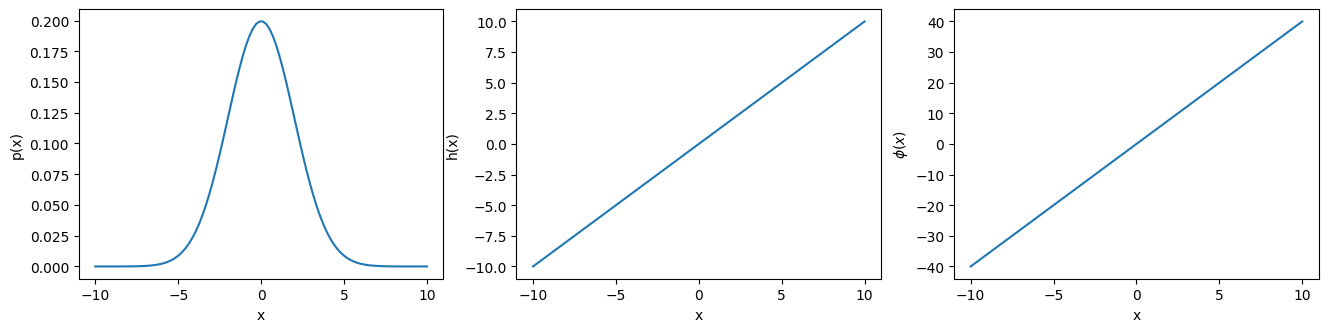

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3.5))
ax[0].plot(x, p(x))
ax[0].set_xlabel('x')
ax[0].set_ylabel('p(x)')

ax[1].plot(x, h(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('h(x)')


ax[2].plot(x, phi(x))
ax[2].set_xlabel('x')
ax[2].set_ylabel('$\phi(x)$')

## Elliptic PDE with spatially varying coefficients

$$
\nabla \cdot (p(x) \nabla \phi(x)) = (h - \bar{h}) p(x) 
$$

with boundary condition,

$$
\int \phi(x) p(x) dx = 0
$$

In [13]:
def pdf(x, mu, sigma):
    return np.exp(-np.square((x - mu)/sigma)/2)/(np.sqrt(2*np.pi)*sigma)

In [22]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

sigma_sq = sigma**2
px = f"exp(-(x - {mu})**2/(2*{sigma_sq}))/(sqrt(2*pi*{sigma_sq}))"
eq = PDE({"u": f"divergence({px} * gradient(u))"})

# Grid and initial condition
grid = CartesianGrid([[-10, 10]], 100)  # generate grid
field = ScalarField(grid, 1)  # generate initial condition

storage = MemoryStorage()  # store intermediate information of the simulation
res = eq.solve(field, Nt, dt=dt, tracker=storage.tracker(1))  # solve the PDE

In [26]:
grid?

Type:           CartesianGrid
String form:    CartesianGrid(bounds=((-10.0, 10.0),), shape=(100,), periodic=[False])
File:           ~/.local/lib/python3.10/site-packages/pde/grids/cartesian.py
Docstring:     
d-dimensional Cartesian grid with uniform discretization for each axis

The grids can be thought of as a collection of n-dimensional boxes, called cells, of
equal length in each dimension. The bounds then defined the total volume covered by
these cells, while the cell coordinates give the location of the box centers. We
index the boxes starting from 0 along each dimension. Consequently, the cell
:math:`i-\frac12` corresponds to the left edge of the  covered interval and the
index :math:`i+\frac12` corresponds to the right edge, when the dimension is covered
by d boxes.

In particular, the discretization along dimension :math:`k` is defined as

.. math::
        x^{(k)}_i &= x^{(k)}_\mathrm{min} + \left(i + \frac12\right)
            \Delta x^{(k)}
        \quad \text{for} \quad i